In [789]:
import os
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [520]:
os.chdir('C:\\Users\\Rishabh Jain\\Desktop\\Data Science Project')

In [521]:
df=pd.read_excel('Absenteeism_at_work_Project.xls',trim_ws=True)
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [522]:
#Setting display to view all the coloumns on the screen
pd.set_option('display.max_columns', 25)
df.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [524]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [525]:
df['Absenteeism time in hours'].isnull().sum()

22

In [526]:
df['Absenteeism time in hours'].value_counts()   
# can't eliminate absenteeism time in hours == 0 as it is comparable to other values

8.0      199
2.0      155
3.0      110
1.0       88
4.0       60
0.0       36
16.0      19
24.0      16
40.0       7
5.0        7
32.0       5
64.0       3
80.0       3
120.0      3
56.0       2
112.0      2
104.0      1
7.0        1
48.0       1
Name: Absenteeism time in hours, dtype: int64

In [527]:
df[df['Absenteeism time in hours'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
15,24,14.0,7.0,6,1,246.0,25.0,16.0,41.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,NaN
20,18,10.0,8.0,4,1,330.0,16.0,4.0,28.0,205917.0,92.0,0.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,NaN
48,20,22.0,9.0,6,1,260.0,50.0,11.0,36.0,241476.0,92.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,NaN
50,20,0.0,9.0,2,4,NaN,50.0,11.0,36.0,241476.0,92.0,NaN,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,NaN
55,36,0.0,9.0,3,4,118.0,13.0,18.0,50.0,NaN,92.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,NaN
63,34,23.0,10.0,3,4,118.0,10.0,10.0,37.0,253465.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,NaN
64,36,0.0,10.0,4,4,118.0,13.0,18.0,50.0,253465.0,93.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,NaN,NaN
215,23,0.0,5.0,4,3,378.0,49.0,11.0,36.0,378884.0,92.0,1.0,1.0,2.0,0.0,1.0,4.0,65.0,174.0,21.0,NaN
219,10,22.0,5.0,6,3,361.0,52.0,3.0,28.0,NaN,92.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,NaN


In [528]:
df1=df[-df['Absenteeism time in hours'].isnull()]    # dropping NULL valued rows in predictor variable i.e., Absenteeism time in hrs
df1.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
10,20,1.0,7.0,2,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0


In [529]:
df1[df1['Absenteeism time in hours'].isnull()]   #confirmed dropped

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [530]:
df1.shape

(718, 21)

In [531]:
def missing_perc(data):
    Missing_Value = pd.DataFrame((data.isnull().sum()/len(data)*100))
    Missing_Value = Missing_Value.rename(columns = {0: 'Missing_percentage'})
    #Arranging Missing Values in Decreasing Order
    Missing_Value = Missing_Value.sort_values('Missing_percentage', ascending = False)
    print(Missing_Value)
missing_perc(df1)

                                 Missing_percentage
Body mass index                            4.038997
Height                                     1.949861
Education                                  1.392758
Work load Average/day                      1.114206
Hit target                                 0.835655
Son                                        0.835655
Transportation expense                     0.835655
Disciplinary failure                       0.696379
Social smoker                              0.557103
Distance from Residence to Work            0.417827
Service time                               0.417827
Social drinker                             0.417827
Reason for absence                         0.417827
Age                                        0.278552
Pet                                        0.278552
Weight                                     0.139276
Month of absence                           0.139276
ID                                         0.000000
Seasons     

In [532]:
# Taking an observation to check weather BMI is calculated using imperical or metric formula
df1.loc[2,:]

ID                                      3.0
Reason for absence                     23.0
Month of absence                        7.0
Day of the week                         4.0
Seasons                                 1.0
Transportation expense                179.0
Distance from Residence to Work        51.0
Service time                           18.0
Age                                    38.0
Work load Average/day              239554.0
Hit target                             97.0
Disciplinary failure                    0.0
Education                               1.0
Son                                     0.0
Social drinker                          1.0
Social smoker                           0.0
Pet                                     0.0
Weight                                 89.0
Height                                170.0
Body mass index                        31.0
Absenteeism time in hours               2.0
Name: 2, dtype: float64

In [533]:
# Weight=89  Height=170  BMI=31
#checking Metric formula assuminng 'height in cm' and 'weight in kg'
b=89/(1.70*1.70)
round(b)

#So, it's concluded that metric BMI formula is used by rounding off the BMI to closest integer value.

31

In [534]:
NA_BMI=np.array(df1[df1['Body mass index'].isnull()].index)
NA_BMI

array([ 14,  24,  27,  31,  37,  41,  42,  52,  53,  56,  57,  58,  77,
        89,  99, 100, 106, 107, 108, 146, 152, 153, 158, 159, 160, 161,
       220, 272, 273], dtype=int64)

In [535]:
type(NA_BMI)

numpy.ndarray

In [536]:
df1[df1['Height'].isnull() & df1['Weight'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [537]:
df1[df1['Weight'].isnull() & df1['Body mass index'].isnull()] # nothing to worry here as where weight is missing BMI is present

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [538]:
df1[df1['Height'].isnull() & df1['Body mass index'].isnull()]   # only two variable where BMI can't be calculated as H is missing

#only for observation at index 272, 273 BMI and Height can't be calculated

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
272,11,19.0,9.0,4,1,289.0,36.0,13.0,33.0,294217.0,81.0,0.0,1.0,2.0,1.0,NaN,1.0,90.0,NaN,NaN,24.0
273,5,0.0,9.0,5,1,235.0,20.0,13.0,43.0,294217.0,81.0,1.0,1.0,1.0,1.0,0.0,0.0,106.0,NaN,NaN,0.0


In [539]:
#only for observation at index 272, 273 BMI and Height can't be calculated so dropping them

NA_BMI1=NA_BMI[:-2]
NA_BMI1
# for these index values BMI will be calculated

array([ 14,  24,  27,  31,  37,  41,  42,  52,  53,  56,  57,  58,  77,
        89,  99, 100, 106, 107, 108, 146, 152, 153, 158, 159, 160, 161,
       220], dtype=int64)

In [540]:
# calculating BMI
for i in NA_BMI1:
    df1.loc[i,'Body mass index']=round(df1.loc[i,'Weight']/((df1.loc[i,'Height']*df1.loc[i,'Height'])/10000))

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [541]:
df1.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              6
Distance from Residence to Work     3
Service time                        3
Age                                 2
Work load Average/day               8
Hit target                          6
Disciplinary failure                5
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                     2
Absenteeism time in hours           0
dtype: int64

In [542]:
# Now calculating missing Height values --second largest missing values after BMI
NA_Height=df1[df1['Height'].isnull()].index
NA_Height=np.array(NA_Height)
NA_Height

array([ 74, 109, 113, 114, 131, 132, 268, 272, 273, 504, 505, 509, 510,
       518], dtype=int64)

In [543]:
# loosing value 272 & 273
NA_Height1=np.delete(NA_Height,np.where(NA_Height==272))
NA_Height1=np.delete(NA_Height1,np.where(NA_Height1==273))
NA_Height1

array([ 74, 109, 113, 114, 131, 132, 268, 504, 505, 509, 510, 518],
      dtype=int64)

In [544]:
#checking decimal places in height like 170.4
chk_decimal=np.array((df1['Height']*10)%10) 
sum(chk_decimal)
#So no decimal places present in whole df1 for Height, hence rounding off while calculating Height

nan

In [547]:
# Calculating missing Heights
for i in NA_Height1:
    df1.loc[i,'Height']=round((sqrt(df1.loc[i,'Weight']/df1.loc[i,'Body mass index']))*100)

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [548]:
NA_Weight=df1[df1['Weight'].isnull()].index
NA_Weight

Int64Index([118], dtype='int64')

In [549]:
chk_decimalw=np.array((df1['Weight']*10)%10)      #So no decimal places present, hence rounding off while calculating Weight
sum(chk_decimalw)

nan

In [550]:
# Calcuating missing weight
df1.loc[NA_Weight,'Weight']=round(df1.loc[NA_Weight,'Body mass index']*
                                  ((df1.loc[NA_Weight,'Height']*df1.loc[NA_Weight,'Height'])/10000))

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [552]:
df1['Reason for absence'].value_counts()    

23.0    146
28.0    109
27.0     69
13.0     54
19.0     40
0.0      36
22.0     33
26.0     32
25.0     31
11.0     25
10.0     23
18.0     21
14.0     18
1.0      16
7.0      15
12.0      8
6.0       7
8.0       6
21.0      6
9.0       4
16.0      3
5.0       3
24.0      3
15.0      2
4.0       2
2.0       1
17.0      1
3.0       1
Name: Reason for absence, dtype: int64

In [553]:
 # 0 is not any specified reason so, making it 26(unjustified absence)
df1.loc[df1['Reason for absence']==0,'Reason for absence']=26

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [753]:
df1[df1['Reason for absence']==0]  #confirmed

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [754]:
df1=df1.reset_index(drop=True)
df1.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
713,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
714,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,93.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
715,4,26.0,0.0,3,1,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
716,8,26.0,0.0,4,2,231.0,35.0,14.0,39.0,271219.0,95.0,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0
717,35,26.0,0.0,6,3,179.0,45.0,14.0,53.0,271219.0,95.0,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0


In [755]:
df1[df1['Education'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
69,11,26.0,10.0,4,4,289.0,36.0,13.0,33.0,NaN,93.0,0.0,NaN,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
101,10,22.0,12.0,4,4,361.0,52.0,3.0,28.0,261306.0,97.0,NaN,NaN,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
102,34,27.0,12.0,6,4,118.0,10.0,10.0,37.0,261306.0,97.0,NaN,NaN,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0
107,34,27.0,1.0,3,2,118.0,10.0,NaN,37.0,308593.0,95.0,0.0,NaN,0.0,0.0,0.0,0.0,83.0,172.0,28.0,1.0
108,14,18.0,1.0,3,2,155.0,12.0,14.0,34.0,308593.0,NaN,0.0,NaN,2.0,1.0,0.0,0.0,95.0,196.0,25.0,8.0
119,34,27.0,1.0,2,2,118.0,10.0,10.0,37.0,308593.0,95.0,0.0,NaN,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0
120,34,27.0,1.0,3,2,118.0,10.0,10.0,37.0,308593.0,95.0,0.0,NaN,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0
123,34,27.0,1.0,4,2,118.0,10.0,NaN,37.0,308593.0,95.0,0.0,NaN,NaN,0.0,0.0,0.0,83.0,172.0,28.0,2.0
257,10,8.0,8.0,3,1,361.0,52.0,3.0,28.0,265615.0,94.0,NaN,NaN,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
262,24,9.0,9.0,2,1,246.0,25.0,16.0,41.0,294217.0,81.0,0.0,NaN,0.0,1.0,0.0,0.0,67.0,170.0,23.0,16.0


In [756]:
df1.iloc[257,:].isnull().sum()

2

In [757]:
k=[]    #having index of rows with more than one null columns
for i in range(len(df1)):
    if(df1.iloc[i,:].isnull().sum()>1):
        k.append(i)
k

[57, 69, 71, 77, 83, 101, 102, 104, 106, 107, 108, 123, 256, 257, 260, 261]

In [758]:
len(k)    #16 rows will be dropped as it contain more than two null variables

16

In [759]:
df2=df1.drop(k)       # dropped rows having multiple columns with null values

In [760]:
df2.shape

(702, 21)

In [761]:
missing_perc(df2)

                                 Missing_percentage
Work load Average/day                      0.854701
Transportation expense                     0.569801
Hit target                                 0.427350
Reason for absence                         0.427350
Son                                        0.427350
Education                                  0.427350
Distance from Residence to Work            0.284900
Disciplinary failure                       0.284900
Social smoker                              0.142450
Social drinker                             0.142450
Age                                        0.142450
Service time                               0.142450
Month of absence                           0.142450
Pet                                        0.142450
Weight                                     0.000000
Height                                     0.000000
Body mass index                            0.000000
ID                                         0.000000
Seasons     

In [762]:
df2[df2['Transportation expense'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
5,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
14,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
29,1,23.0,8.0,5,1,NaN,11.0,14.0,37.0,205917.0,92.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
45,15,14.0,9.0,2,4,NaN,31.0,12.0,40.0,241476.0,92.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,32.0


'Transportation expense' is directly proportional to 'Distance from Residence to Work'

In [763]:
df2.loc[df2['Distance from Residence to Work']==31,'Transportation expense'].mode()[0]

291.0

In [764]:
NA_Transport=df2[df2['Transportation expense'].isnull()].index
NA_Transport=np.array(NA_Transport)
NA_Transport

array([ 5, 14, 29, 45], dtype=int64)

In [765]:
# filling null values of 'Transportation expense' with mode value for the same 'Distance from Residence to Work'
for i in NA_Transport:
    df2.loc[i,'Transportation expense']=df2.loc[df2['Distance from Residence to Work']==
                                                df2.loc[i,'Distance from Residence to Work'],'Transportation expense'].mode()[0]

In [766]:
df2[df2['Transportation expense'].isnull()]    # all Null cleared from Transportation expense

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [767]:
# same thing for 'Distance from Residence to Work'
NA_Distance=df2[df2['Distance from Residence to Work'].isnull()].index
NA_Distance=np.array(NA_Distance)
NA_Distance

array([42, 73], dtype=int64)

In [768]:
for i in NA_Distance:
    df2.loc[i,'Distance from Residence to Work']=df2.loc[df2['Transportation expense']==df2.loc[i,'Transportation expense'],
                                                         'Distance from Residence to Work'].mode()[0]

In [769]:
missing_perc(df2)

                                 Missing_percentage
Work load Average/day                      0.854701
Hit target                                 0.427350
Reason for absence                         0.427350
Education                                  0.427350
Son                                        0.427350
Disciplinary failure                       0.284900
Social smoker                              0.142450
Month of absence                           0.142450
Pet                                        0.142450
Service time                               0.142450
Age                                        0.142450
Social drinker                             0.142450
Body mass index                            0.000000
Height                                     0.000000
Weight                                     0.000000
ID                                         0.000000
Distance from Residence to Work            0.000000
Transportation expense                     0.000000
Seasons     

In [770]:
df2[df2['Work load Average/day '].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
76,15,23.0,11.0,5,4,291.0,31.0,12.0,40.0,NaN,93.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,5.0
85,20,28.0,11.0,6,4,260.0,50.0,11.0,36.0,NaN,93.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
96,34,19.0,12.0,3,4,118.0,10.0,10.0,37.0,NaN,97.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,56.0
97,10,22.0,12.0,4,4,361.0,52.0,3.0,28.0,NaN,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
105,28,23.0,1.0,4,2,225.0,26.0,9.0,28.0,NaN,95.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,170.0,24.0,1.0
124,27,23.0,1.0,5,2,184.0,42.0,7.0,27.0,NaN,95.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,166.0,21.0,2.0


In [771]:
df2.loc[df2['Hit target']==93,'Work load Average/day '].mean()
# employee has to work a day in order to achieve his target so, 'Work load Average/day' directly proportional to 'hit target'

# so the logic is to achieve that target what is the average work load/day of a customer

261587.65217391305

In [772]:
df2[df2['Hit target']==93]  # for same service time the work load varies drastically so won't take mode into account

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
56,3,23.0,10.0,3,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
58,3,23.0,NaN,6,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
59,28,23.0,10.0,6,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,3.0
60,34,23.0,10.0,3,4,118.0,10.0,10.0,37.0,253465.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,3.0
61,28,23.0,10.0,4,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,2.0
62,33,23.0,10.0,4,4,248.0,25.0,14.0,47.0,253465.0,93.0,0.0,1.0,2.0,0.0,0.0,1.0,86.0,165.0,32.0,2.0
63,15,23.0,10.0,5,4,291.0,31.0,12.0,40.0,253465.0,93.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,5.0
64,3,23.0,10.0,4,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
65,28,23.0,10.0,4,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,3.0
66,20,19.0,10.0,5,4,260.0,50.0,11.0,36.0,253465.0,93.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,16.0


In [773]:
NA_Work=df2[df2['Work load Average/day '].isnull()].index
NA_Work=np.array(NA_Work)
NA_Work

array([ 76,  85,  96,  97, 105, 124], dtype=int64)

In [774]:
# filling NA in mean of Work load Average/day of those values where Hit target was same as of that observation

for i in NA_Work:
    df2.loc[i,'Work load Average/day ']=round(df2.loc[df2['Hit target']==
                                                      df2.loc[i,'Hit target'],'Work load Average/day '].mean())

In [775]:
df2['Work load Average/day '].isnull().sum() #confirmed

0

In [776]:
df2[df2['Hit target'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
74,3,13.0,11.0,5,4,179.0,51.0,18.0,38.0,306345.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
115,34,27.0,1.0,3,2,118.0,10.0,10.0,37.0,308593.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0
116,34,27.0,1.0,4,2,118.0,10.0,10.0,37.0,308593.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,2.0


In [777]:
df2[df2['Work load Average/day ']==306345]   # for these work load Average/day the hit target is same so we will take mode method

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
72,3,23.0,11.0,5,4,179.0,51.0,18.0,38.0,306345.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
73,28,23.0,11.0,4,4,225.0,26.0,9.0,28.0,306345.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,1.0
74,3,13.0,11.0,5,4,179.0,51.0,18.0,38.0,306345.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
75,17,21.0,11.0,5,4,179.0,22.0,17.0,40.0,306345.0,93.0,0.0,2.0,2.0,0.0,1.0,0.0,63.0,170.0,22.0,8.0
78,6,22.0,11.0,2,4,189.0,29.0,13.0,33.0,306345.0,93.0,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,8.0
79,15,14.0,11.0,2,4,291.0,31.0,12.0,40.0,306345.0,93.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,40.0
80,28,23.0,11.0,4,4,225.0,26.0,9.0,28.0,306345.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,1.0
81,14,6.0,11.0,6,4,155.0,12.0,14.0,34.0,306345.0,93.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,8.0
82,28,23.0,11.0,4,4,225.0,26.0,9.0,28.0,306345.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,3.0
84,28,13.0,11.0,6,4,225.0,26.0,9.0,28.0,306345.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,3.0


In [778]:
NA_Target=df2[df2['Hit target'].isnull()].index
NA_Target=np.array(NA_Target)
NA_Target

array([ 74, 115, 116], dtype=int64)

In [779]:
# filling hit target with mode of same work load Average/day
for i in NA_Target:
    df2.loc[i,'Hit target']=df2.loc[df2['Work load Average/day ']==df2.loc[i,'Work load Average/day '],'Hit target'].mode()[0]

In [780]:
df2['Hit target'].isnull().sum()   #confirmed

0

In [781]:
df2=df2.reset_index(drop=True)

In [782]:
missing_perc(df2)

                                 Missing_percentage
Reason for absence                          0.42735
Education                                   0.42735
Son                                         0.42735
Disciplinary failure                        0.28490
Social drinker                              0.14245
Month of absence                            0.14245
Pet                                         0.14245
Service time                                0.14245
Age                                         0.14245
Social smoker                               0.14245
ID                                          0.00000
Body mass index                             0.00000
Height                                      0.00000
Weight                                      0.00000
Hit target                                  0.00000
Work load Average/day                       0.00000
Distance from Residence to Work             0.00000
Transportation expense                      0.00000
Seasons     

In [783]:
df2[(df2['Month of absence']==10) | (df2['Month of absence'].isnull())]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
56,3,23.0,10.0,3,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
57,3,23.0,NaN,6,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
58,28,23.0,10.0,6,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,3.0
59,34,23.0,10.0,3,4,118.0,10.0,10.0,37.0,253465.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,3.0
60,28,23.0,10.0,4,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,2.0
61,33,23.0,10.0,4,4,248.0,25.0,14.0,47.0,253465.0,93.0,0.0,1.0,2.0,0.0,0.0,1.0,86.0,165.0,32.0,2.0
62,15,23.0,10.0,5,4,291.0,31.0,12.0,40.0,253465.0,93.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,5.0
63,3,23.0,10.0,4,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
64,28,23.0,10.0,4,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,3.0
65,20,19.0,10.0,5,4,260.0,50.0,11.0,36.0,253465.0,93.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,16.0


From above it can be observed that for the months the data is given in sequence with the index values
as from 56-68, 261-286, 473-497 all indexes have same value for "Month of absence", so it will be logical to fill the null value in month of absence with 10 as it is in sequence with month 10

In [784]:
df2.loc[df2['Month of absence'].isnull(),'Month of absence']=10
df2.iloc[57,:]

ID                                      3.0
Reason for absence                     23.0
Month of absence                       10.0
Day of the week                         6.0
Seasons                                 4.0
Transportation expense                179.0
Distance from Residence to Work        51.0
Service time                           18.0
Age                                    38.0
Work load Average/day              253465.0
Hit target                             93.0
Disciplinary failure                    0.0
Education                               1.0
Son                                     0.0
Social drinker                          1.0
Social smoker                           0.0
Pet                                     0.0
Weight                                 89.0
Height                                170.0
Body mass index                        31.0
Absenteeism time in hours               3.0
Name: 57, dtype: float64

In [785]:
df2['Month of absence'].isnull().sum()     # confirmed

0

In [786]:
df2[df2['Disciplinary failure']==1]    # No pattern found for Education as thought

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,26.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
46,29,26.0,9.0,2,4,225.0,26.0,9.0,28.0,241476.0,92.0,1.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,0.0
49,11,26.0,9.0,3,4,289.0,36.0,13.0,33.0,241476.0,92.0,1.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,0.0
52,13,26.0,9.0,4,4,369.0,17.0,12.0,31.0,241476.0,92.0,1.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,25.0,0.0
183,2,26.0,4.0,2,3,235.0,29.0,12.0,48.0,326452.0,96.0,1.0,1.0,1.0,0.0,1.0,5.0,88.0,163.0,33.0,0.0
193,7,26.0,5.0,4,3,279.0,5.0,14.0,39.0,378884.0,92.0,1.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,0.0
194,18,26.0,5.0,4,3,330.0,16.0,4.0,28.0,378884.0,92.0,1.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,0.0
195,31,26.0,5.0,4,3,388.0,15.0,9.0,50.0,378884.0,92.0,1.0,1.0,0.0,0.0,0.0,0.0,76.0,178.0,24.0,0.0
228,20,26.0,7.0,5,1,260.0,50.0,11.0,36.0,275312.0,98.0,1.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,0.0
248,8,26.0,9.0,3,1,231.0,35.0,14.0,39.0,294217.0,81.0,1.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0


In [790]:
#imputing remaining missing values with mode for each column using Scikit Imputer method
x=df2.values
Imputer = Imputer(missing_values ='NaN', strategy='most_frequent', axis=0)
Imputer = Imputer.fit(x)
x=Imputer.transform(x)

In [791]:
x

array([[ 11.,  26.,   7., ..., 172.,  30.,   4.],
       [ 36.,  26.,   7., ..., 178.,  31.,   0.],
       [  3.,  23.,   7., ..., 170.,  31.,   2.],
       ...,
       [  4.,  26.,   0., ..., 170.,  34.,   0.],
       [  8.,  26.,   0., ..., 170.,  35.,   0.],
       [ 35.,  26.,   0., ..., 175.,  25.,   0.]])

In [792]:
df3=pd.DataFrame(x)     #df3
df3.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,26.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
6,20.0,23.0,7.0,6.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
7,14.0,19.0,7.0,2.0,1.0,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
8,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
9,20.0,1.0,7.0,2.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0


In [793]:
df3.columns=df2.columns.values
df3.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,26.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
6,20.0,23.0,7.0,6.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
7,14.0,19.0,7.0,2.0,1.0,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
8,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
9,20.0,1.0,7.0,2.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0


In [794]:
df2.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,26.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,10,22.0,7.0,6,1,361.0,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
6,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
7,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
8,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
9,20,1.0,7.0,2,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0


In [795]:
missing_perc(df3)   # No missing value present now

                                 Missing_percentage
ID                                              0.0
Disciplinary failure                            0.0
Body mass index                                 0.0
Height                                          0.0
Weight                                          0.0
Pet                                             0.0
Social smoker                                   0.0
Social drinker                                  0.0
Son                                             0.0
Education                                       0.0
Hit target                                      0.0
Reason for absence                              0.0
Work load Average/day                           0.0
Age                                             0.0
Service time                                    0.0
Distance from Residence to Work                 0.0
Transportation expense                          0.0
Seasons                                         0.0
Day of the w

In [796]:
df3.shape

(702, 21)

In [797]:
# Algo to compute year
# so year is changing when month is going from 12 to 1
df3['year']=np.nan
y=1
k=0
m=df3.shape[0]-1
for y in range(1,5):
    for i in range(k,m):
        df3.loc[i,'year']=y
        if((df3.loc[i,'Month of absence']==12)&(df3.loc[i+1,'Month of absence']==1)):
            k=i+1
            break
df3.loc[m,'year']=y    # for last value

In [798]:
# year value given
max_year=df3['year'].max()
for i in list(df3['year'].unique()):
    df3['year']=df3['year'].replace(i,(2011-max_year+(i-1)))

In [799]:
df3

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,year
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,2007.0
1,36.0,26.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0,2007.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0,2007.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0,2007.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0,2007.0
5,10.0,22.0,7.0,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0,2007.0
6,20.0,23.0,7.0,6.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0,2007.0
7,14.0,19.0,7.0,2.0,1.0,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0,2007.0
8,1.0,22.0,7.0,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0,2007.0
9,20.0,1.0,7.0,2.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0,2007.0


In [800]:
df3[df3['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,year
699,4.0,26.0,0.0,3.0,1.0,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0,2010.0
700,8.0,26.0,0.0,4.0,2.0,231.0,35.0,14.0,39.0,271219.0,95.0,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0,2010.0
701,35.0,26.0,0.0,6.0,3.0,179.0,45.0,14.0,53.0,271219.0,95.0,0.0,1.0,1.0,0.0,0.0,1.0,77.0,175.0,25.0,0.0,2010.0


In [801]:
df3[df3['Month of absence']==0].index

Int64Index([699, 700, 701], dtype='int64')

In [802]:
df3[(df3['Seasons']==2)&(df3['year']==4)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,year


In [803]:
# deleting the last two rows containing year=4 and season=2,3 as they are not following the normal pattern of season
# in the dataset i.e., 2,3,1,4. Also, both have absenteeism tim in hrs =0 so it won;t affect model in 
# calculating losses for company
# replacing value month of absence by 7 to the year=4, season=1 & month of absence=0 after seeing the sequence
# followed by data rows just above it
df4=df3.iloc[:-2,:]
df4.loc[df4['Month of absence']==0,'Month of absence']=7
df4.tail()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,year
695,28.0,22.0,7.0,4.0,1.0,225.0,26.0,9.0,28.0,264604.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,8.0,2010.0
696,13.0,13.0,7.0,2.0,1.0,369.0,17.0,12.0,31.0,264604.0,93.0,0.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,25.0,80.0,2010.0
697,11.0,14.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0,2010.0
698,1.0,11.0,7.0,3.0,1.0,235.0,11.0,14.0,37.0,264604.0,93.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0,2010.0
699,4.0,26.0,7.0,3.0,1.0,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0,2010.0


In [804]:
df4['Month of absence'].unique() # Done with removing month =0

array([ 7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.])

In [805]:
df4.groupby('year')['Absenteeism time in hours'].sum()   # yearly absenteeism time in hours

year
2007.0     676.0
2008.0    1647.0
2009.0    1315.0
2010.0    1256.0
Name: Absenteeism time in hours, dtype: float64

In [806]:
df4['year']=df4['year'].astype('int')    # to remove decimals
df4['year']=df4['year'].astype('str')
df4['Month of absence']=df4['Month of absence'].astype('int')    # to remove decimals
df4['Month of absence']=df4['Month of absence'].astype('str')
df4.head(5)

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,year
0,11.0,26.0,7,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,2007
1,36.0,26.0,7,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0,2007
2,3.0,23.0,7,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0,2007
3,7.0,7.0,7,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0,2007
4,11.0,23.0,7,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0,2007


In [807]:
df4['Period']=df4['Month of absence']+'-'+df4['year']
df4['Period']=pd.to_datetime(df4['Period'],format='%m-%Y')
df4.head(20)

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,year,Period
0,11.0,26.0,7,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,2007,2007-07-01
1,36.0,26.0,7,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0,2007,2007-07-01
2,3.0,23.0,7,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0,2007,2007-07-01
3,7.0,7.0,7,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0,2007,2007-07-01
4,11.0,23.0,7,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0,2007,2007-07-01
5,10.0,22.0,7,6.0,1.0,361.0,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0,2007,2007-07-01
6,20.0,23.0,7,6.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0,2007,2007-07-01
7,14.0,19.0,7,2.0,1.0,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0,2007,2007-07-01
8,1.0,22.0,7,2.0,1.0,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0,2007,2007-07-01
9,20.0,1.0,7,2.0,1.0,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0,2007,2007-07-01


In [808]:
#re-ordering in order to get year varaible near season
df4=df4[['ID', 'Reason for absence','Period', 'Month of absence', 'Day of the week',
       'Seasons','year', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']]
df4.head(5)

,ID,Reason for absence,Period,Month of absence,Day of the week,Seasons,year,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,2007-07-01,7,3.0,1.0,2007,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,26.0,2007-07-01,7,3.0,1.0,2007,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,2007-07-01,7,4.0,1.0,2007,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,2007-07-01,7,5.0,1.0,2007,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,2007-07-01,7,5.0,1.0,2007,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# Exploratory Data Analysis

In [810]:
df_EDA=df4.copy()

In [811]:
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index']
categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week','Seasons','year',
                    'Disciplinary failure','Education', 'Social drinker','Social smoker', 'Pet', 'Son']

In [812]:
for i in categorical_vars:
    df_EDA[i]=df_EDA[i].astype('int')   # to remove decimal from categories
    df_EDA[i]=df_EDA[i].astype('category')

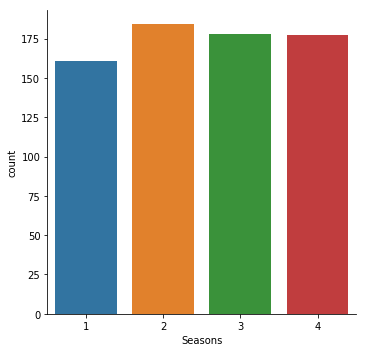

In [813]:
sns.factorplot(data=df_EDA, x='Seasons', kind= 'count',size=5)
plt.show()

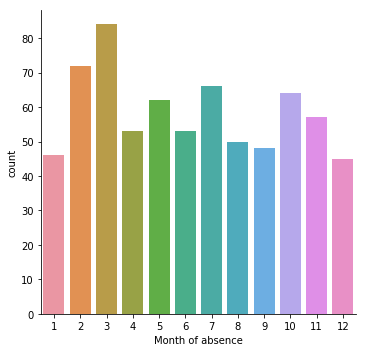

In [814]:
sns.factorplot(data=df_EDA, x='Month of absence', kind= 'count',size=5)
plt.show()

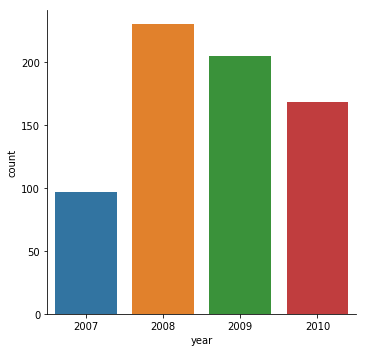

In [815]:
sns.factorplot(data=df_EDA, x='year', kind= 'count',size=5)
plt.show()

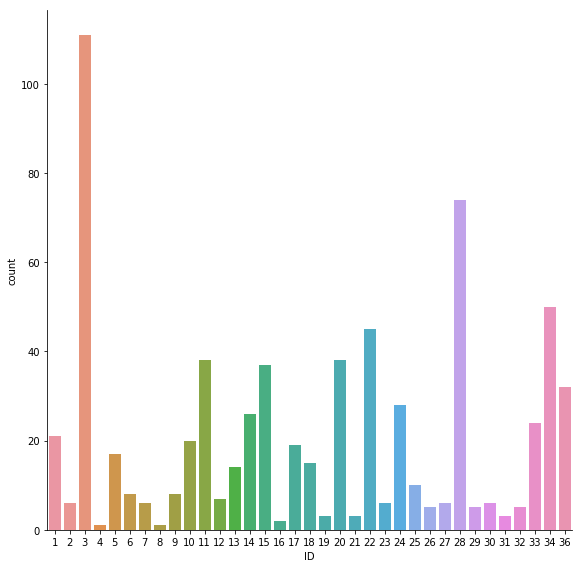

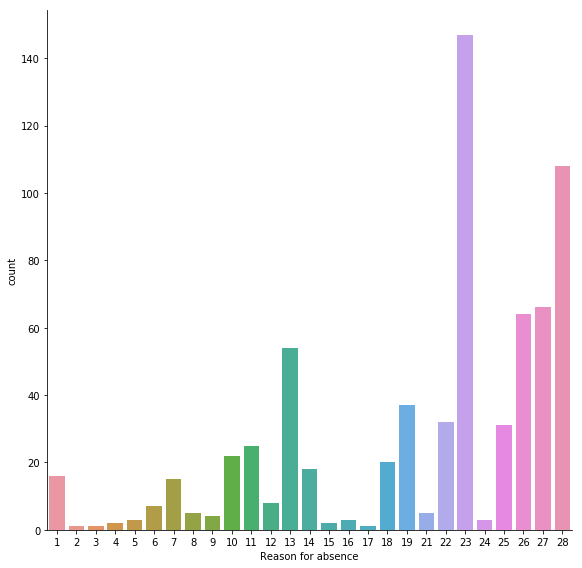

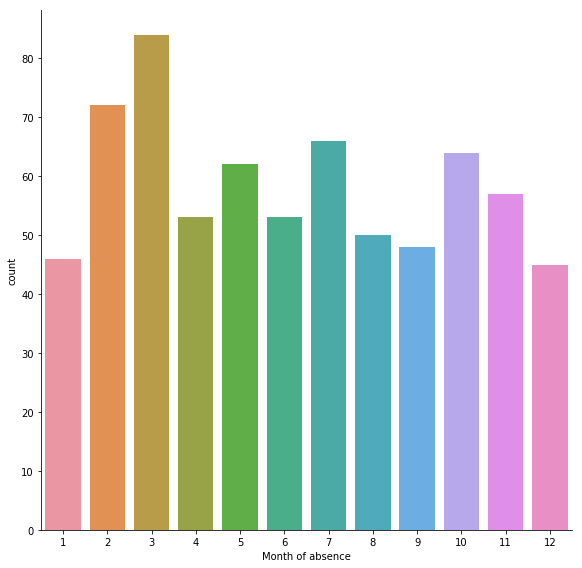

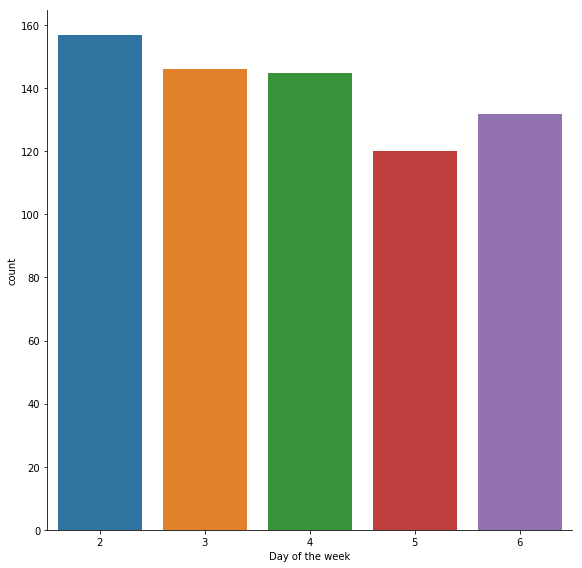

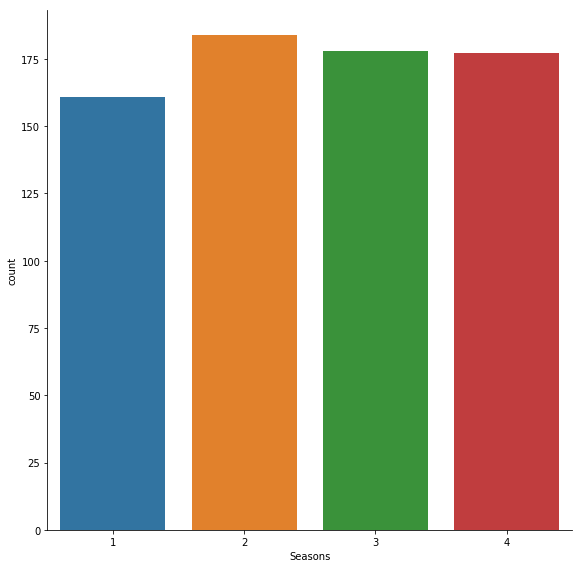

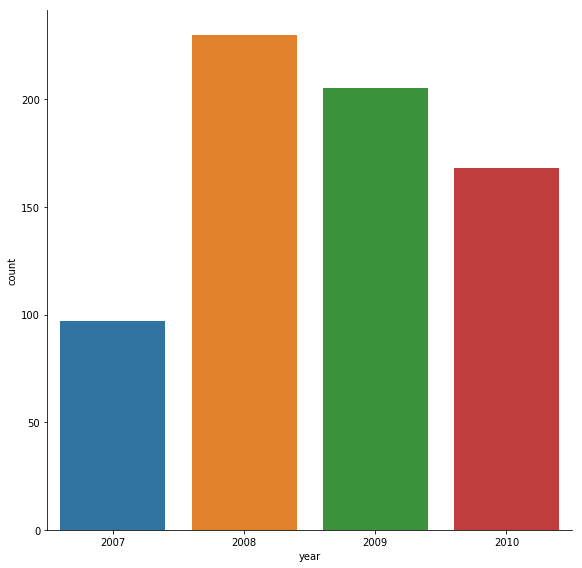

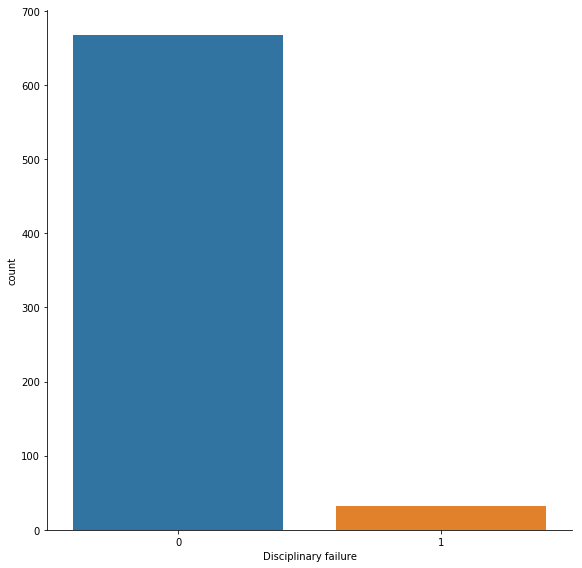

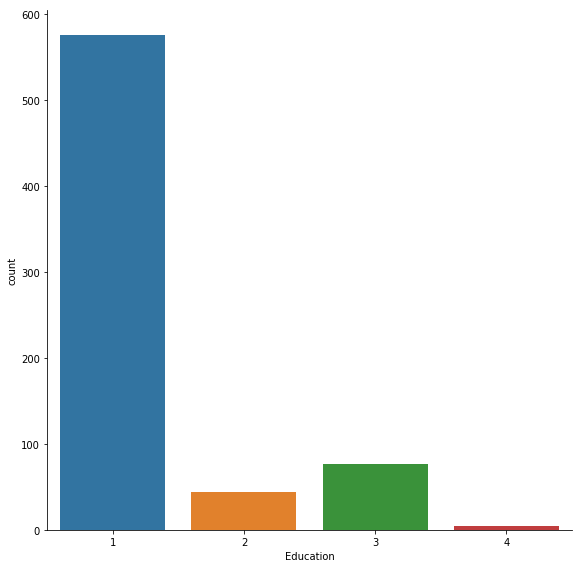

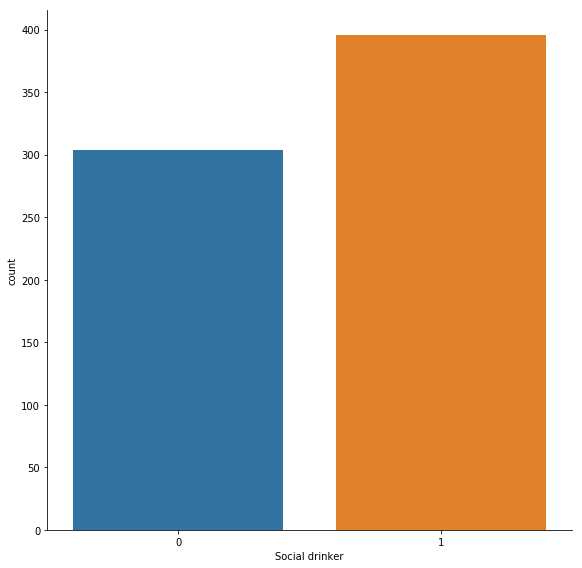

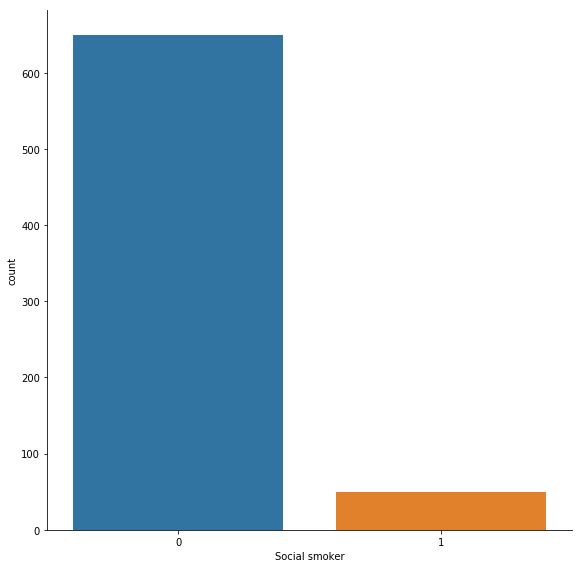

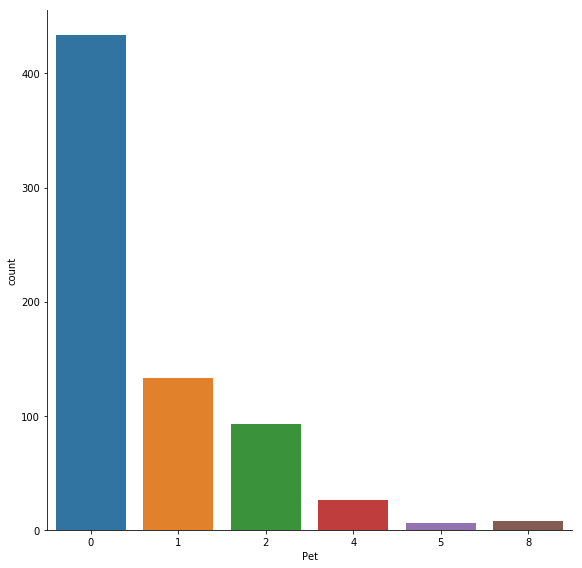

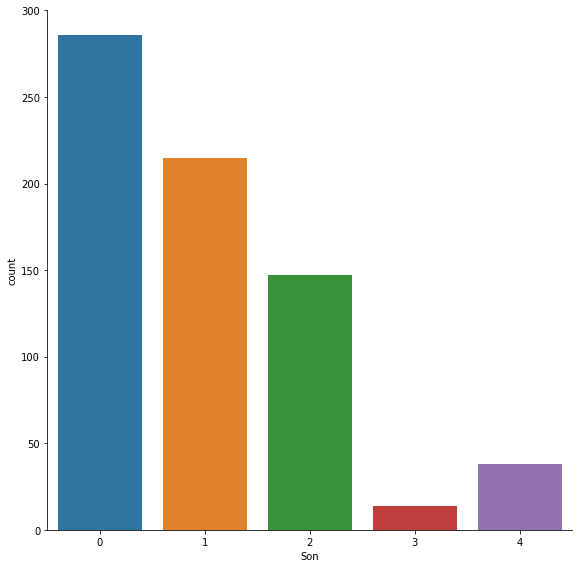

In [816]:
for i in categorical_vars:
    sns.factorplot(data=df_EDA, x=i, kind= 'count',size=8)
plt.show()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


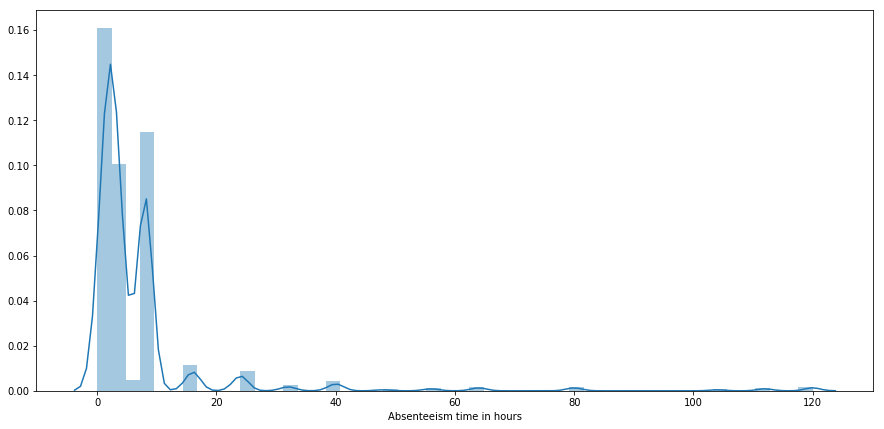

In [817]:
plt.figure(figsize=(15,7))
sns.distplot(df_EDA['Absenteeism time in hours'])   
plt.show()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


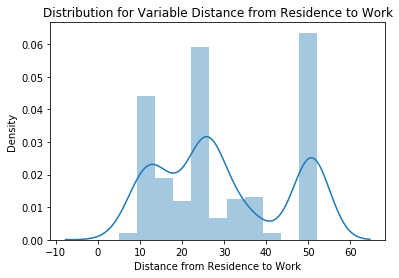

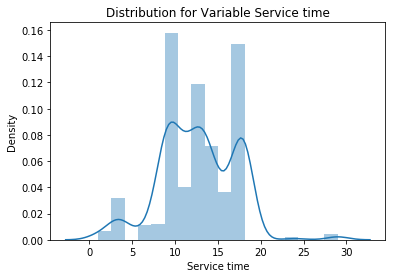

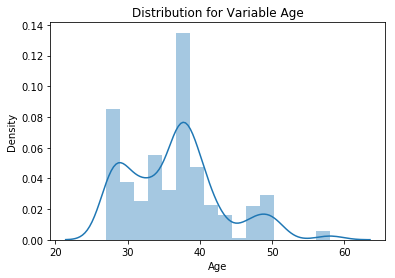

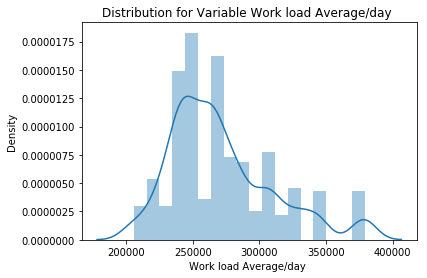

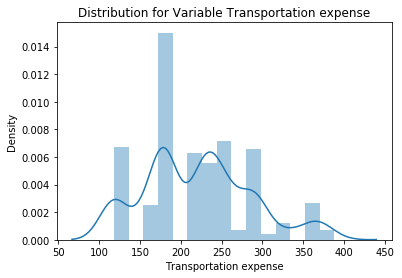

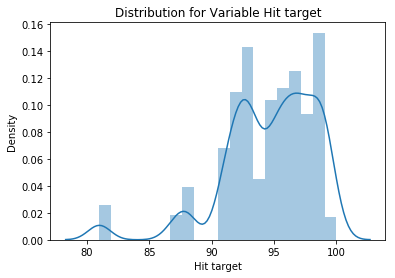

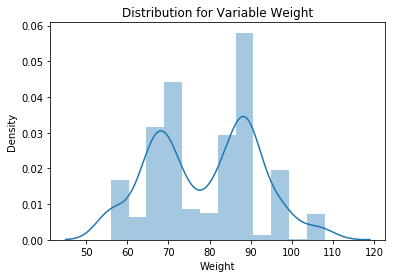

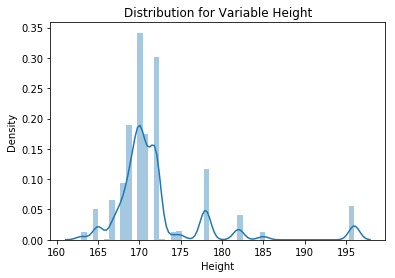

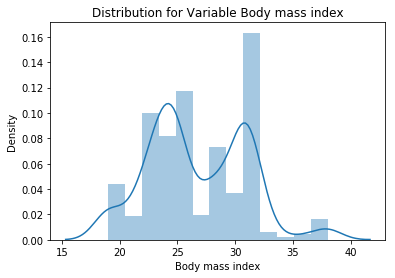

In [818]:
# Distribution of continuous variables
for i in continuous_vars:
    sns.distplot(df_EDA[i],bins = 'auto')
    plt.title("Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

# Outlier Analysis

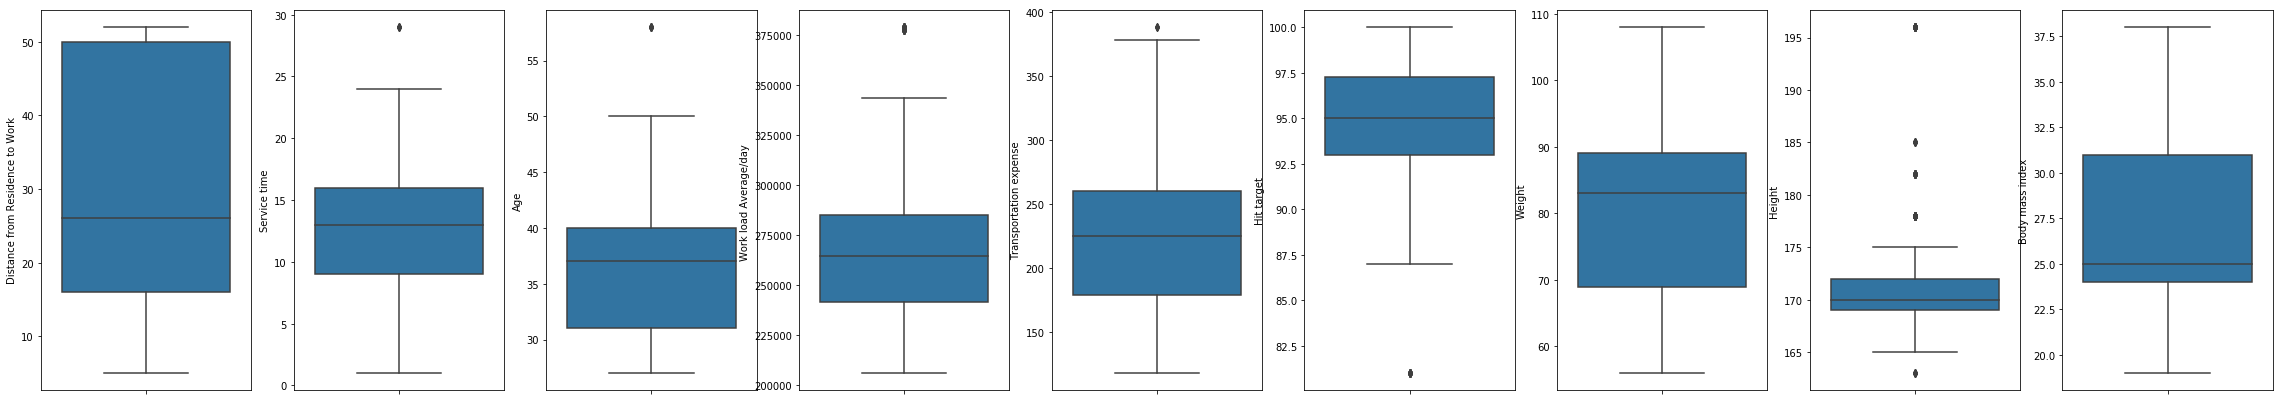

In [819]:
fig, axes=plt.subplots(1,len(continuous_vars), figsize=(40,7))
for i in range(len(continuous_vars)):
    sns.boxplot(y=continuous_vars[i],ax=axes[i], data=df_EDA) 
plt.show()

In [820]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']
continuous_vars=[x for x in continuous_vars if x not in neglect]
continuous_vars

['Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height']

In [821]:
# Looping over all continuou variables to detect and remove Outliers
for i in continuous_vars:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df_EDA[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Capping all the outliers
    df_EDA.loc[df_EDA[i] < minimum,i] = minimum
    df_EDA.loc[df_EDA[i] > maximum,i] = maximum

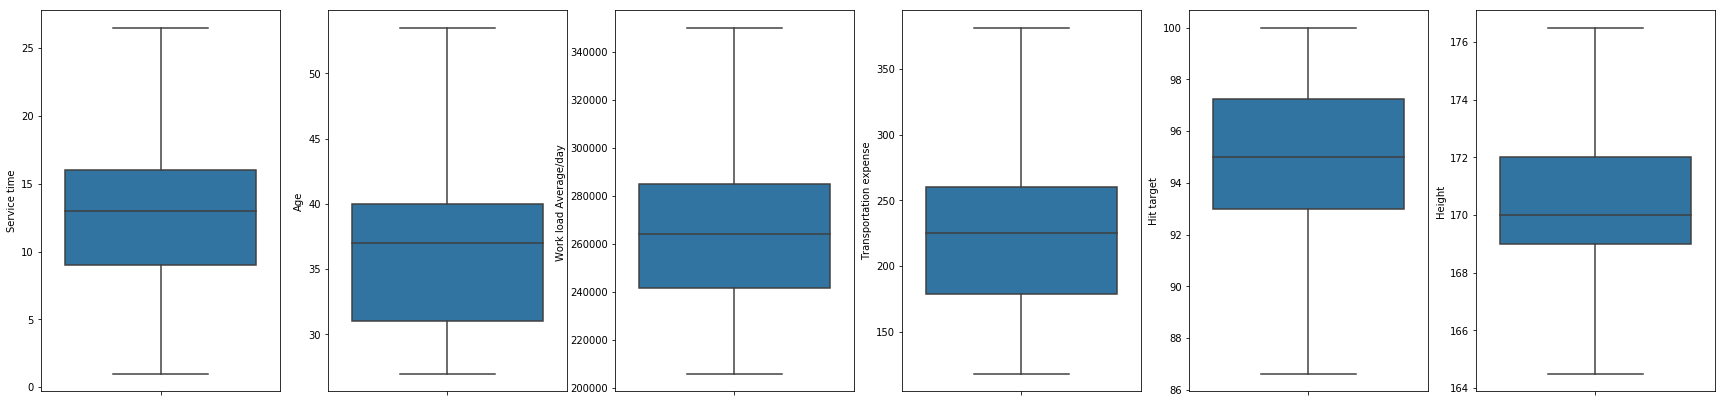

In [822]:
# All outliers are treated
fig, axes=plt.subplots(1,len(continuous_vars), figsize=(30,7))
for i in range(len(continuous_vars)):
    sns.boxplot(y=continuous_vars[i],ax=axes[i], data=df_EDA) 
plt.show()

# Relationship between Independent and Dependent variable

In [823]:
# Function to see how each variable is related to 'Absenteeism time in hours'
def relationship(a,b):
    df_rel = df_EDA.groupby(a)[b].sum()
    df_rel = df_rel.reset_index()
    df_rel[b] = (df_rel[b]*100)/sum(df_EDA[b])
    df_rel = df_rel.sort_values(by=['Absenteeism time in hours'])
    print(df_rel)
    df_rel.plot.barh(x=a,y=b, figsize = (12,10))
    plt.show()

   Reason for absence  Absenteeism time in hours
15                 16                   0.122599
16                 17                   0.163465
2                   3                   0.163465
3                   4                   0.183899
14                 15                   0.326931
4                   5                   0.388230
1                   2                   0.490396
7                   8                   0.490396
22                 24                   0.490396
19                 21                   0.551696
23                 25                   2.206784
6                   7                   3.064978
25                 27                   3.105844
13                 14                   3.248876
5                   6                   3.330609
8                   9                   3.432775
10                 11                   3.616673
0                   1                   3.718839
11                 12                   3.821005
17                 1

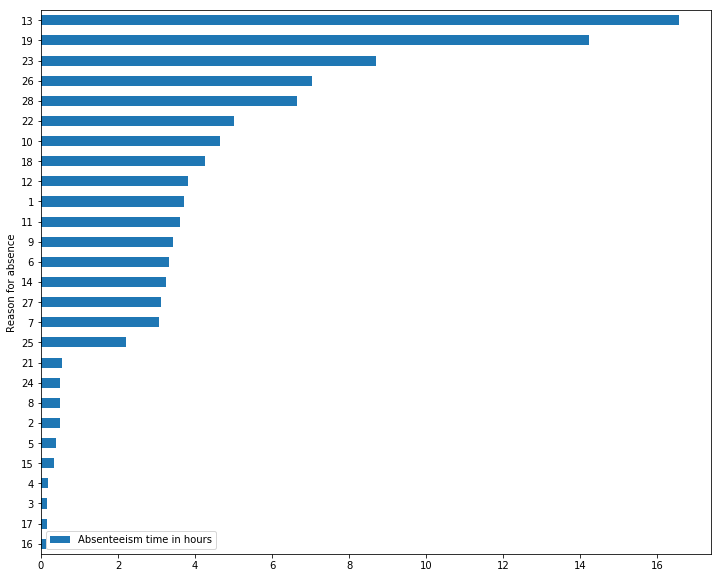

In [824]:
relationship('Reason for absence','Absenteeism time in hours')

   Month of absence  Absenteeism time in hours
0                 1                   4.290969
7                 8                   5.230895
8                 9                   5.312628
1                 2                   6.007356
9                10                   6.763384
11               12                   7.560278
4                 5                   8.009808
5                 6                   8.234573
10               11                   8.643237
3                 4                   9.848794
6                 7                  14.793625
2                 3                  15.304454


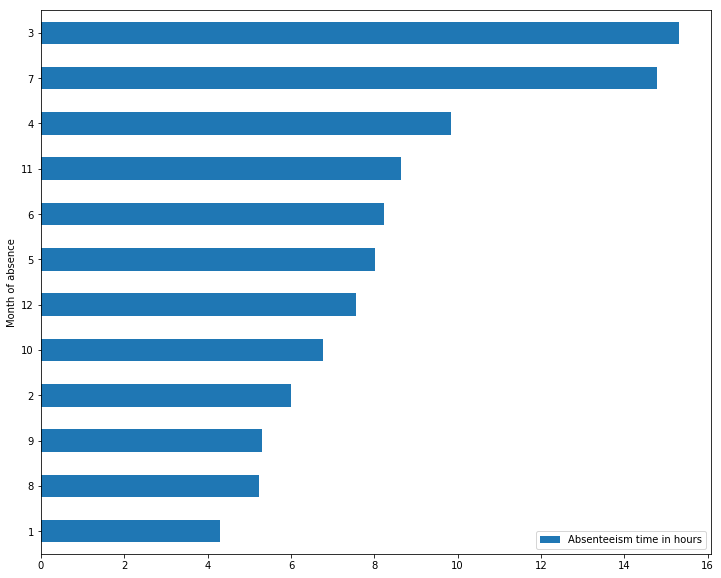

In [827]:
relationship('Month of absence','Absenteeism time in hours')

  Day of the week  Absenteeism time in hours
3               5                  11.115652
4               6                  13.976298
2               4                  21.270944
1               3                  26.338374
0               2                  27.298733


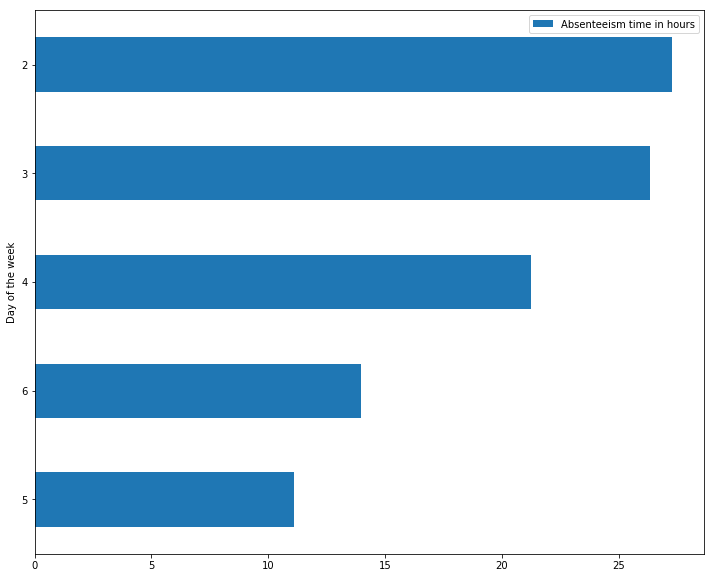

In [829]:
relationship('Day of the week','Absenteeism time in hours')

  Education  Absenteeism time in hours
3         4                   0.429097
1         2                   5.680425
2         3                   8.316306
0         1                  85.574172


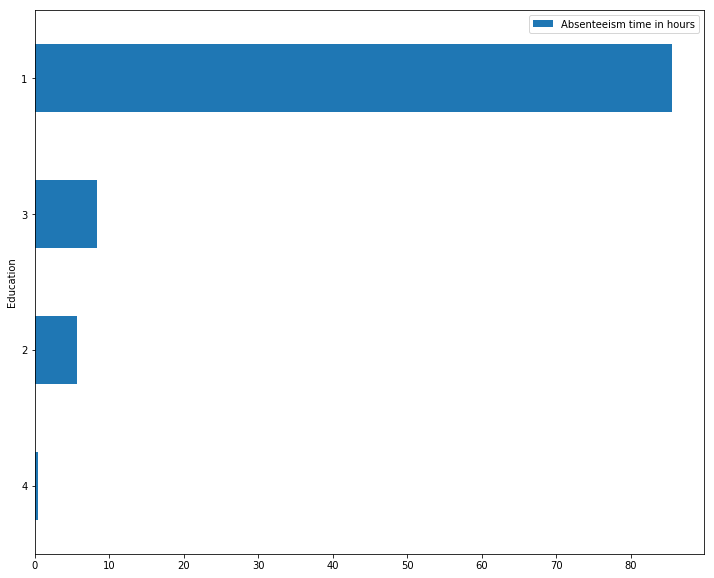

In [831]:
relationship('Education','Absenteeism time in hours')

In [836]:
df_EDA['Education'].value_counts()

1    576
3     76
2     44
4      4
Name: Education, dtype: int64

  Son  Absenteeism time in hours
3   3                   3.575807
4   4                   5.966490
1   1                  27.278300
0   0                  31.283204
2   2                  31.896199


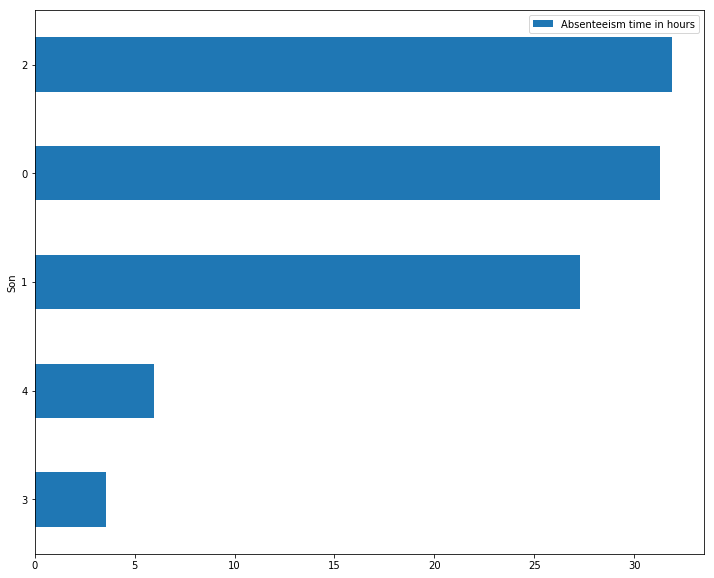

In [838]:
relationship('Son','Absenteeism time in hours')

    ID  Absenteeism time in hours
3    4                   0.000000
7    8                   0.000000
18  19                   0.122599
15  16                   0.326931
31  32                   0.326931
30  31                   0.326931
20  21                   0.326931
26  27                   0.388230
28  29                   0.429097
1    2                   0.510830
29  30                   0.633429
22  23                   0.653862
11  12                   0.694728
24  25                   0.858194
5    6                   1.471189
32  33                   1.491622
25  26                   1.695954
4    5                   2.125051
17  18                   2.247650
0    1                   2.308950
16  17                   2.411116
6    7                   3.064978
9   10                   3.146710
12  13                   3.575807
23  24                   4.863098
21  22                   5.149162
14  15                   5.169595
8    9                   5.353494
19  20        

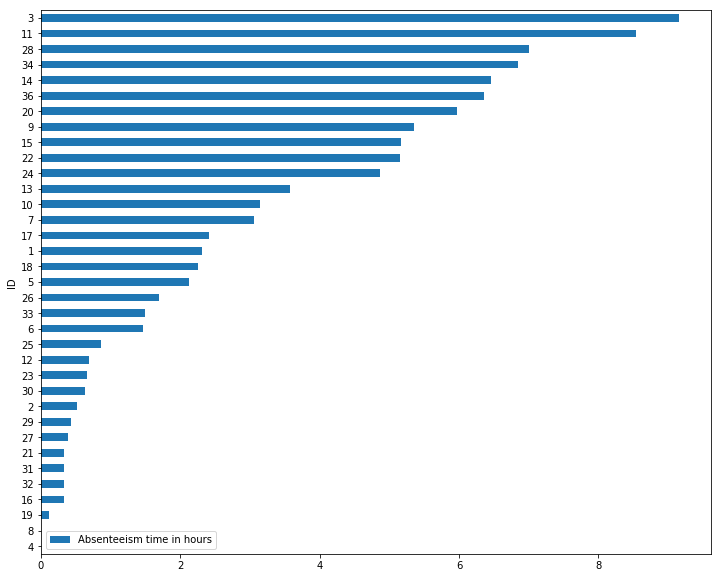

In [839]:
relationship('ID','Absenteeism time in hours')

    Distance from Residence to Work  Absenteeism time in hours
16                             35.0                   0.000000
19                             48.0                   0.326931
18                             42.0                   0.388230
13                             27.0                   0.633429
20                             49.0                   0.653862
6                              15.0                   1.082959
14                             29.0                   1.982019
9                              20.0                   2.125051
10                             22.0                   2.411116
2                              11.0                   2.635881
0                               5.0                   3.064978
7                              16.0                   3.105844
23                             52.0                   3.146710
8                              17.0                   3.575807
15                             31.0                   5

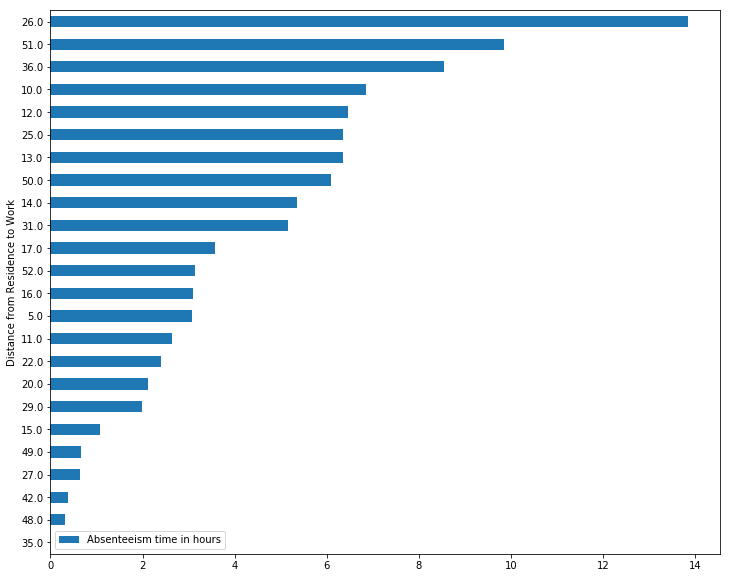

In [840]:
relationship('Distance from Residence to Work','Absenteeism time in hours')

# Final Dataframe Preperation

In [841]:
# Our final df will contain only the "Period" value and "Absenteeism time in hours"
# Because to forecast for 2011 other features are not given to us

df_o=pd.DataFrame(df4.groupby('Period')['Absenteeism time in hours'].sum())
df_o.head(10)

,Absenteeism time in hours
Period,
2007-07-01,119.0
2007-08-01,132.0
2007-09-01,80.0
2007-10-01,59.0
2007-11-01,121.0
2007-12-01,165.0
2008-01-01,48.0
2008-02-01,87.0
2008-03-01,281.0


In [842]:
df_o.shape

(37, 1)

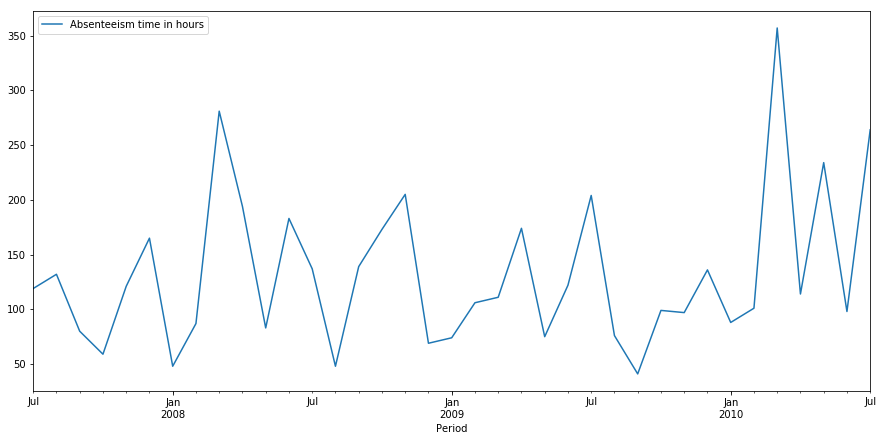

In [844]:
df_o.plot(kind='line',figsize=(15,7))
plt.show()

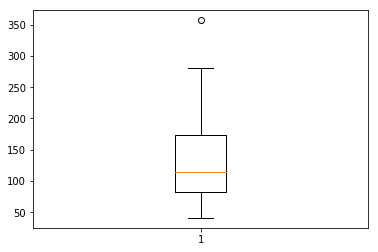

In [845]:
plt.boxplot(df_o['Absenteeism time in hours'])     # 1 outlier found for this data
plt.show()

In [846]:
q75, q25 = np.percentile(df_o.loc[:,'Absenteeism time in hours'], [75,25])
iqr = q75 - q25
minn = q25 - (iqr*1.5)
maxx = q75 + (iqr*1.5)
print("minimum value: {}".format(minn))
print("maximum value: {}".format(maxx))

minimum value: -52.0
maximum value: 308.0


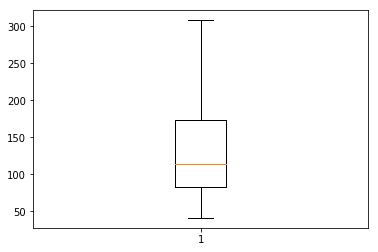

In [847]:
df_o.loc[df_o['Absenteeism time in hours'] > maxx,'Absenteeism time in hours'] = maxx

plt.boxplot(df_o['Absenteeism time in hours'])     # Outlier treated by "capping the outlier"
plt.show()

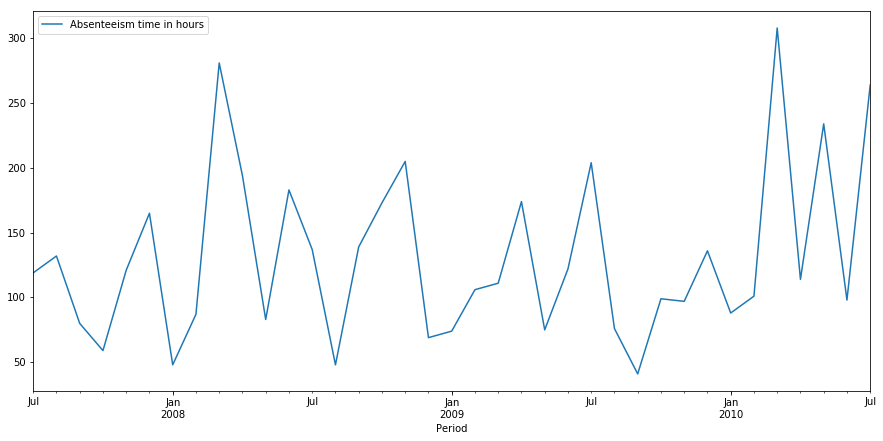

In [848]:
df_o.plot(kind='line',figsize=(15,7))
plt.show()

In [849]:
df_o.columns.values

array(['Absenteeism time in hours'], dtype=object)

# Time Series ARIMA

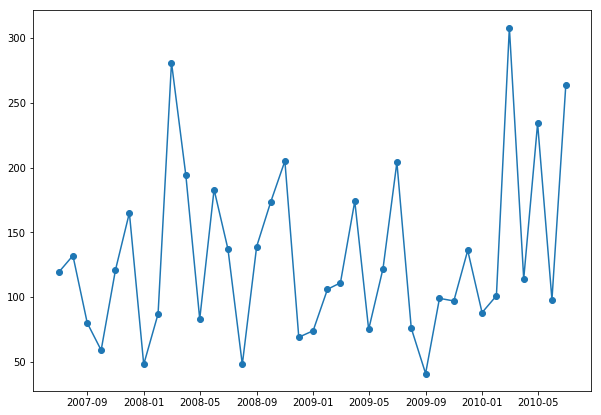

In [851]:
df_ts=df_o.copy()
plt.figure(figsize=(10,7))
plt.plot(df_ts, marker='o')
plt.show()

In [852]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=(7,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [853]:
df_ts.dtypes

Absenteeism time in hours    float64
dtype: object

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


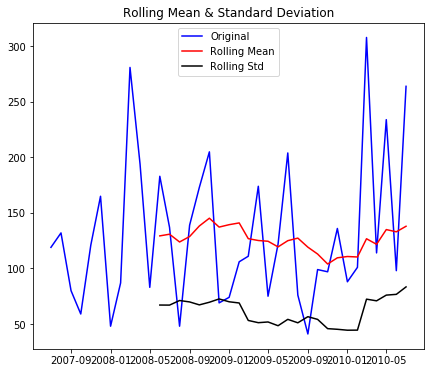

Results of Dickey-Fuller Test:
Test Statistic                -5.885099e+00
p-value                        3.014574e-07
#Lags Used                     0.000000e+00
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [854]:
test_stationarity(df_ts)

Data is Stationary as ADF Test Statistics< Critical Value(1%,5% & 10%) and also p-value(=3.01e-7)< 0.05

In [855]:
dftest = adfuller(df_o['Absenteeism time in hours'], autolag='AIC')

In [856]:
dftest

(-5.8850988996909575,
 3.014574495996037e-07,
 0,
 36,
 {'1%': -3.626651907578875,
  '10%': -2.6116707716049383,
  '5%': -2.9459512825788754},
 294.94857083687805)

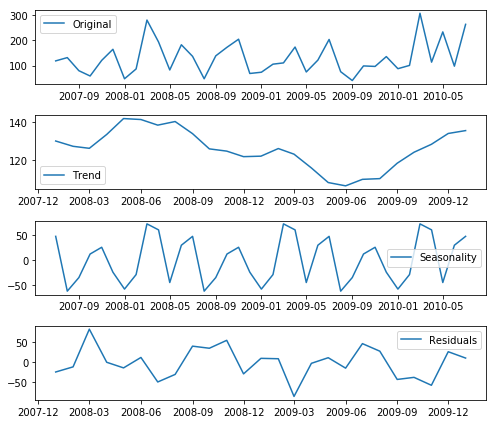

In [857]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(7,6))
plt.subplot(411)
plt.plot(df_ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


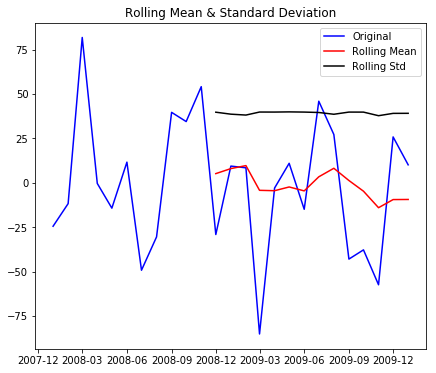

Results of Dickey-Fuller Test:
Test Statistic                 -0.395487
p-value                         0.910850
#Lags Used                      9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [859]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

Residuals are not stationary that's why we have the Moving Average part

In [860]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

first order differencing: difference between current and just previous obseration

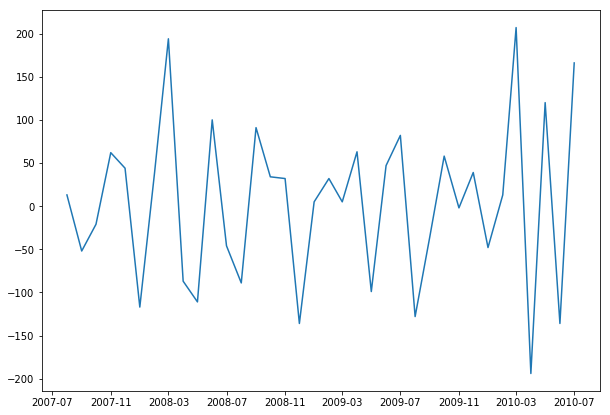

In [862]:
df_ts_diff = df_ts - df_ts.shift(1)
plt.figure(figsize=(10,7))
plt.plot(df_ts_diff)
plt.show()

In [863]:
df_ts_diff.dropna(inplace=True)

In [864]:
lag_acf = acf(df_ts_diff, nlags=20)
lag_pacf = pacf(df_ts_diff, nlags=20, method='ols')

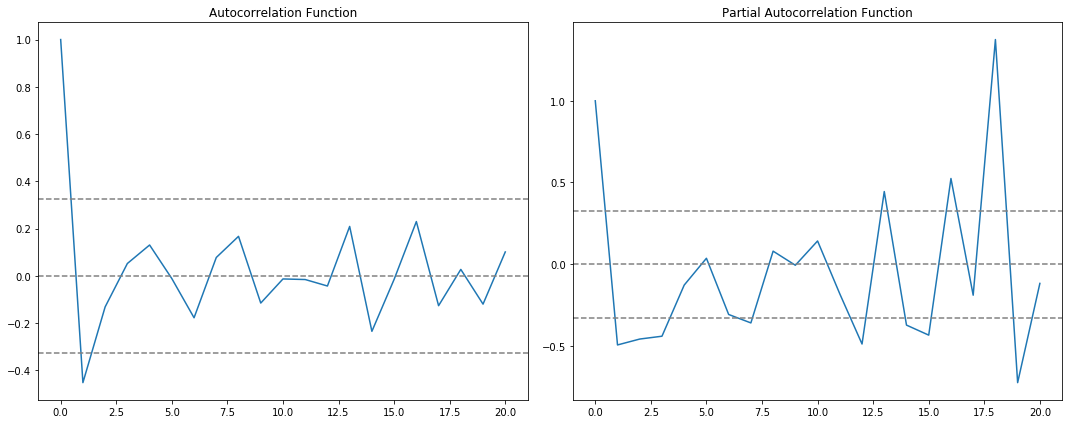

In [865]:
#Plot ACF: 
plt.figure(figsize=(15,6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.show()

p=1 and q=1

In [866]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be i

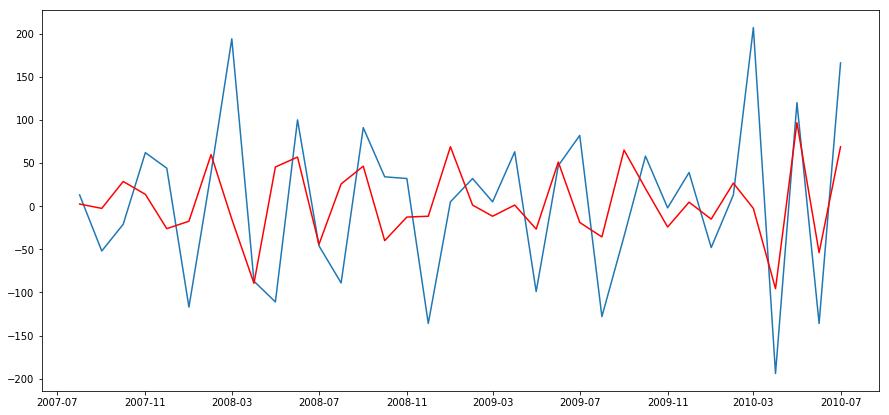

In [867]:
# AR

model = ARIMA(df_ts, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(15,7))
plt.plot(df_ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


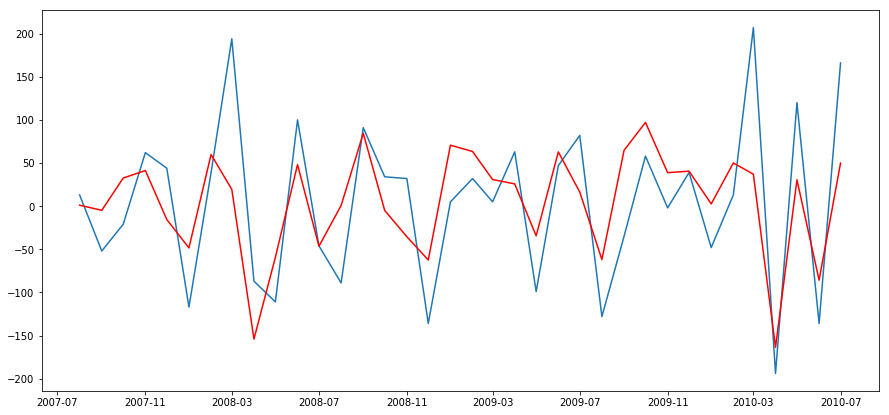

In [868]:
# MA

model = ARIMA(df_ts, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(15,7))
plt.plot(df_ts_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


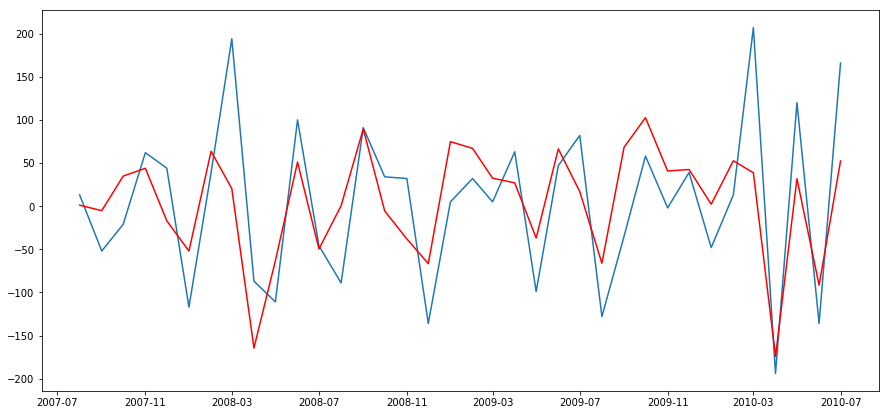

In [869]:
# ARIMA

model = ARIMA(df_ts, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(15,7))
plt.plot(df_ts_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

In [870]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Period
2007-08-01     1.090946
2007-09-01    -5.217588
2007-10-01    34.829512
2007-11-01    43.873506
2007-12-01   -16.948154
dtype: float64


Not started from 2007-07-01 as it is the base value nothing behind it to subtract to take lag of 1

In [871]:
predictions_ARIMA_diff1=pd.concat([pd.Series(df_ts.ix[0]), predictions_ARIMA_diff])
predictions_ARIMA_diff1.index=df_ts.index
predictions_ARIMA_diff1.head()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Period
2007-07-01    119.000000
2007-08-01      1.090946
2007-09-01     -5.217588
2007-10-01     34.829512
2007-11-01     43.873506
dtype: float64

In [872]:
predictions_ARIMA = predictions_ARIMA_diff1.cumsum()
print(predictions_ARIMA.head())

Period
2007-07-01    119.000000
2007-08-01    120.090946
2007-09-01    114.873357
2007-10-01    149.702869
2007-11-01    193.576376
dtype: float64


In [873]:
df_result['ARIMA']=predictions_ARIMA.values    # predictions_ARIMA is a series
rmse_for_test =np.sqrt(mean_squared_error(df_result['Absenteeism time in hours'],df_result['ARIMA']))
rmse_for_test

141.24478745013187

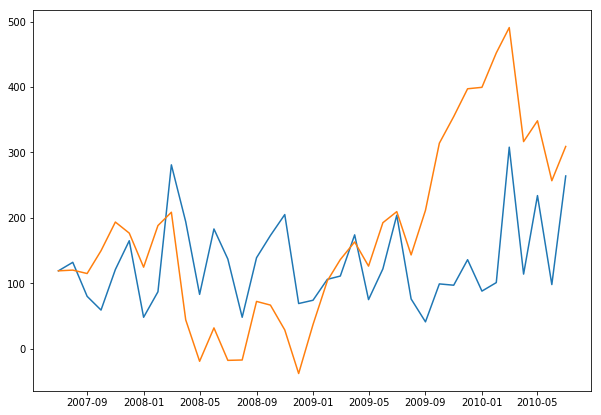

In [875]:
#df_result['ARIMA']=predictions_ARIMA
plt.figure(figsize=(10, 7)) 
plt.plot(df_ts)
plt.plot(predictions_ARIMA)
plt.show()

In [876]:
preds_2011 = results_ARIMA.predict(start=1,end=53)
preds_2011.tail(18)

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2010-07-01     52.368603
2010-08-01   -122.344562
2010-09-01      8.429398
2010-10-01      0.654662
2010-11-01      1.116883
2010-12-01      1.089404
2011-01-01      1.091037
2011-02-01      1.090940
2011-03-01      1.090946
2011-04-01      1.090946
2011-05-01      1.090946
2011-06-01      1.090946
2011-07-01      1.090946
2011-08-01      1.090946
2011-09-01      1.090946
2011-10-01      1.090946
2011-11-01      1.090946
2011-12-01      1.090946
Freq: MS, dtype: float64

In [877]:
index_new=pd.concat([pd.Series(df_ts.index[0]),pd.Series(preds_2011.index)])
index_new.head()

0   2007-07-01
0   2007-08-01
1   2007-09-01
2   2007-10-01
3   2007-11-01
dtype: datetime64[ns]

In [878]:
predictions_ARIMA_diff_2011=pd.concat([pd.Series(df_ts.ix[0]), preds_2011])
predictions_ARIMA_diff_2011.index=index_new
predictions_ARIMA_diff_2011.head()

2007-07-01    119.000000
2007-08-01      1.090946
2007-09-01     -5.217588
2007-10-01     34.829512
2007-11-01     43.873506
dtype: float64

In [879]:
predictions_ARIMA_2011 = predictions_ARIMA_diff_2011.cumsum()
print(predictions_ARIMA_2011.head())

2007-07-01    119.000000
2007-08-01    120.090946
2007-09-01    114.873357
2007-10-01    149.702869
2007-11-01    193.576376
dtype: float64


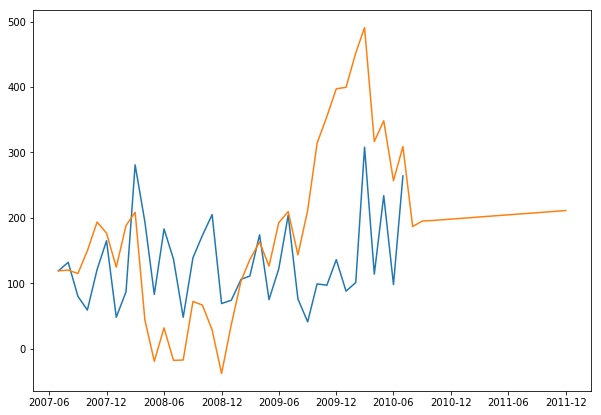

In [881]:
plt.figure(figsize=(10,7))
plt.plot(df_ts)
plt.plot(predictions_ARIMA_2011)
plt.show()

C:\Users\Rishabh Jain\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


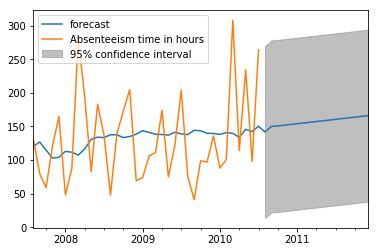

In [882]:
results_ARIMA.plot_predict(1,53)

In [885]:
predictions_ARIMA_2011[-19:]

2010-06-01    256.720944
2010-07-01    309.089547
2010-08-01    186.744985
2010-09-01    195.174382
2010-10-01    195.829044
2010-11-01    196.945928
2010-12-01    198.035331
2011-01-01    199.126369
2011-02-01    200.217309
2011-03-01    201.308255
2011-04-01    202.399200
2011-05-01    203.490146
2011-06-01    204.581091
2011-07-01    205.672037
2011-08-01    206.762982
2011-09-01    207.853928
2011-10-01    208.944874
2011-11-01    210.035819
2011-12-01    211.126765
dtype: float64

In [883]:
Loss=predictions_ARIMA_2011[-12:].sum()   # loss in 2011
Loss

2461.51877326941